### 묘사적 데이터 분석(DDA - Descriptive Data Analysis)
- 목적 : 입원기간에 영향을 미치는 요인들을 분석해보고자 한다.

- 목표변수 : 입원기간
- 설명변수 : 신장, 체중, 고혈압여부, 당뇨여부, 심혈관질환, 연령
    * 연속형 - 신장, 체중, 연령
    * 범주형 - 고혈압여부, 당뇨여부, 연령

In [23]:
import pandas as pd

In [68]:
df_ROS = pd.read_csv('../../dataset/RecurrenceOfSurgery_quest.csv')
df_ROS.head(2)

,Unnamed: 0,고혈압여부,당뇨여부,성별,스테로이드치료,신장,심혈관질환,연령,입원기간,체중,환자통증정도,수술시간,재발여부
0,0,0,0,2,1,163,0,66,2,60.3,10,68.0,0
1,1,0,0,1,1,171,0,47,1,71.7,10,31.0,0


In [51]:
df_ROS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1840 entries, 0 to 1839
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1840 non-null   object 
 1   고혈압여부       1840 non-null   object 
 2   당뇨여부        1840 non-null   object 
 3   성별          1840 non-null   int64  
 4   스테로이드치료     1840 non-null   int64  
 5   신장          1840 non-null   int64  
 6   심혈관질환       1840 non-null   object 
 7   연령          1840 non-null   int64  
 8   입원기간        1840 non-null   int64  
 9   체중          1840 non-null   float64
 10  환자통증정도      1840 non-null   int64  
 11  수술시간        1840 non-null   float64
 12  재발여부        1840 non-null   int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 187.0+ KB


#### 데이터 타입 확인 후 변환
- 결과
    - 연속형 : 신장, 체중, 연령
    - 범주형 : 고혈압여부, 당뇨여부, 심혈관질환

In [43]:
# 고혈압여부, 당뇨여부, 심혈관 질환 (int -> str)
df_ROS['고혈압여부'] = df_ROS['고혈압여부'].astype(str)

In [44]:
df_ROS['당뇨여부'] = df_ROS['당뇨여부'].astype(str)

In [45]:
df_ROS['심혈관질환'] = df_ROS['심혈관질환'].astype(str)

In [36]:
df_ROS['Unnamed: 0'] = df_ROS['Unnamed: 0'].astype(str)

In [52]:
df_ROS.dtypes

Unnamed: 0     object
고혈압여부          object
당뇨여부           object
성별              int64
스테로이드치료         int64
신장              int64
심혈관질환          object
연령              int64
입원기간            int64
체중            float64
환자통증정도          int64
수술시간          float64
재발여부            int64
dtype: object

In [48]:
import matplotlib.pyplot as plt
# 한글처리
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns

In [63]:
df_ROS[['신장','체중', '연령']].describe()

,신장,체중,연령
count,1840.000000,1840.000000,1840.00000
mean,168.067935,68.134185,41.51250
std,9.211623,11.187705,13.38467
min,140.000000,35.000000,15.00000
25%,161.000000,59.700000,32.00000
50%,169.000000,68.000000,41.00000
75%,175.000000,75.100000,49.00000
max,204.000000,136.100000,84.00000


In [60]:
# 연속형 count 확인 (신장, 체중, 연령)
continues_list = df_ROS[['신장','체중','연령']].columns.to_list()

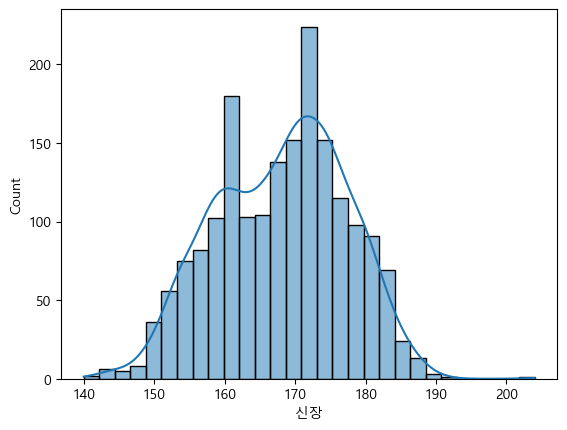

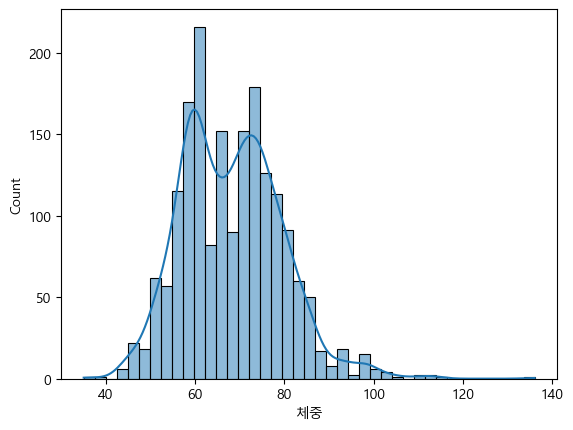

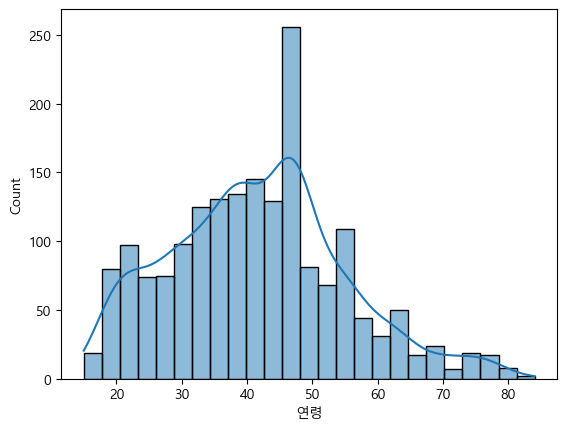

In [61]:
for continues in continues_list :
    sns.histplot(data=df_ROS, x=continues, kde=True)
    plt.show()

In [64]:
# 범주형 확인 (고혈압여부, 당노여부, 심혈관질환)
df_ROS[['고혈압여부','당뇨여부','심혈관질환']].describe(include=object)

,고혈압여부,당뇨여부,심혈관질환
count,1840,1840,1840
unique,2,2,2
top,0,0,0
freq,1598,1724,1774


In [65]:
# 각 범주별 레코드 개수 확인
df_ROS['고혈압여부'].value_counts()

0    1598
1     242
Name: 고혈압여부, dtype: int64

<Axes: xlabel='고혈압여부', ylabel='count'>

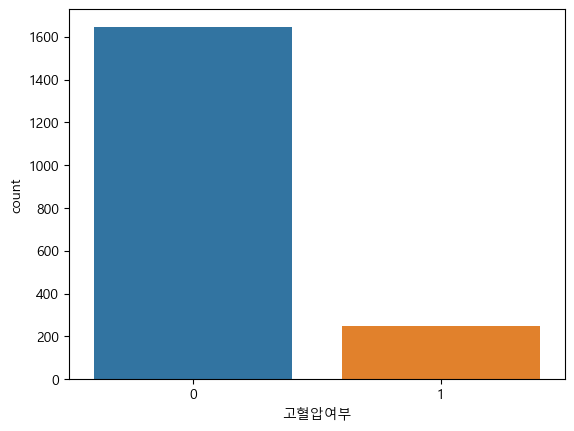

In [76]:
sns.countplot(data=df_ROS, x='고혈압여부')

In [66]:
df_ROS['당뇨여부'].value_counts()

0    1724
1     116
Name: 당뇨여부, dtype: int64

<Axes: xlabel='당뇨여부', ylabel='count'>

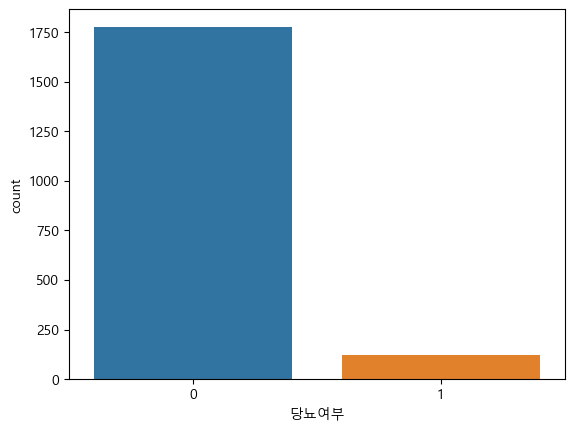

In [77]:
sns.countplot(data=df_ROS, x='당뇨여부')

In [67]:
df_ROS['심혈관질환'].value_counts()

0    1774
1      66
Name: 심혈관질환, dtype: int64

<Axes: xlabel='심혈관질환', ylabel='count'>

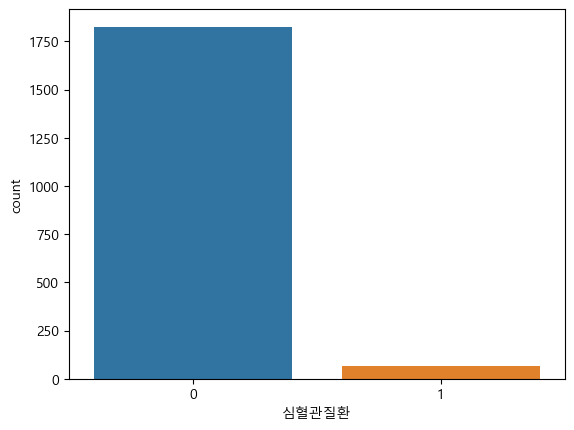

In [78]:
sns.countplot(data=df_ROS, x='심혈관질환')